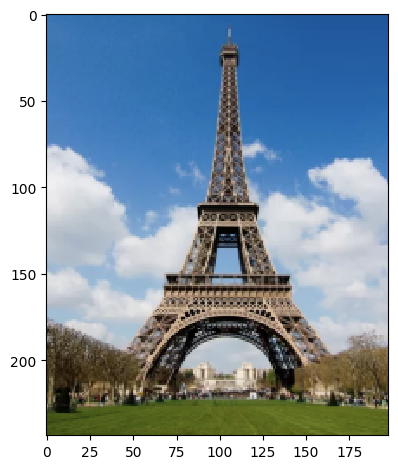

In [3]:
import skimage.io
import matplotlib.pyplot as plt
img = skimage.io.imread('image.png')
skimage.io.imshow(img)
plt.show()

array([[[ 57, 115, 176],
        [ 57, 115, 175],
        [ 57, 115, 176],
        ...,
        [ 33,  85, 154],
        [ 33,  85, 154],
        [ 33,  85, 154]],

       [[ 59, 115, 177],
        [ 59, 115, 177],
        [ 58, 115, 177],
        ...,
        [ 33,  85, 154],
        [ 33,  85, 154],
        [ 33,  85, 154]],

       [[ 60, 116, 176],
        [ 60, 116, 176],
        [ 59, 117, 177],
        ...,
        [ 32,  86, 154],
        [ 32,  86, 154],
        [ 32,  86, 154]],

       ...,

       [[ 66,  82,  22],
        [ 69,  86,  25],
        [ 68,  86,  24],
        ...,
        [ 90, 106,  30],
        [ 87, 105,  29],
        [ 84, 101,  28]],

       [[ 67,  83,  23],
        [ 63,  79,  20],
        [ 63,  79,  20],
        ...,
        [ 85, 101,  28],
        [ 80,  98,  26],
        [ 74,  93,  24]],

       [[ 67,  82,  23],
        [ 68,  84,  24],
        [ 67,  83,  22],
        ...,
        [ 87, 102,  29],
        [ 82,  99,  26],
        [ 92, 109,  33]]], dtype=uint8)
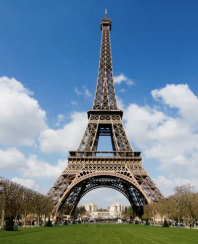

In [96]:
img

In [98]:
x = (img/255).reshape(-1,3)
x

array([[0.22352941, 0.45098039, 0.69019608],
       [0.22352941, 0.45098039, 0.68627451],
       [0.22352941, 0.45098039, 0.69019608],
       ...,
       [0.34117647, 0.4       , 0.11372549],
       [0.32156863, 0.38823529, 0.10196078],
       [0.36078431, 0.42745098, 0.12941176]])

In [9]:
import pandas as pd
import numpy as np
import math

In [165]:
class KMeans:
  def __init__(self, k, converge = 0.0001, itermax = 50):
    self.k = k
    self.itermax = itermax
    self.convergencaccept = converge
  def pred(self, point):
    dist = [self.euclid(point,self.centroids[centroid]) for centroid in self.centroids]
    pred = dist.index(min(dist))
    return pred
  def euclid(self,x,y):
    return np.sqrt(np.sum((np.array(x)-np.array(y))**2))
  def fit(self, imagedata,startcent):
    self.centroids = {}
    self.cost = {}

    for i in range(self.k):
      self.centroids[i] = startcent[i]

    for i in range(self.itermax):
      self.clusters = {}
      converged = False
      for j in range(self.k):
        self.clusters[j] = []

      for x in imagedata:
        dists = []
        for cent in self.centroids:
          dists.append(self.euclid(x,self.centroids[cent]))
        cluster = dists.index(min(dists))
        self.clusters[cluster].append(x)
      prev = dict(self.centroids)

      for cluster in self.clusters:
        self.centroids[cluster] = np.average(self.clusters[cluster],axis=0)

      for centroid in self.centroids:
        prevcent = prev[centroid]
        currcent = self.centroids[centroid]
        self.cost[centroid] = np.sqrt(np.sum((currcent - prevcent)**2))
        if self.cost[centroid] < self.convergencaccept:
          converged = True
      if converged:
        dist = []
        for centroid in self.centroids:
          for x in self.clusters[centroid]:
            dist.append(self.euclid(x,self.centroids[centroid]))
        self.sse = sum(dist)
        break

In [154]:
color_scheme = [[60,179,113],
 [0,191,255],
 [255,255,0],
 [255,0,0],
 [0,0,0],
 [169,169,169],
 [255,140,0],
 [128,0,128],
 [255,192,203],
 [255,255,255]]

{0: array([0.31119468, 0.29822856, 0.17981581]), 1: array([0.46592995, 0.59360364, 0.7355923 ])}
13847.297136161471


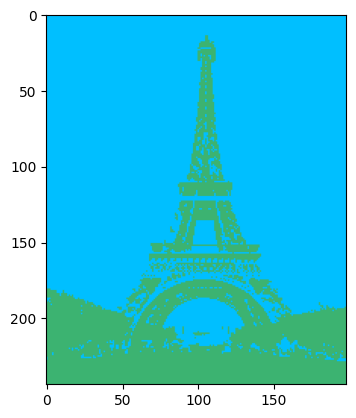

In [166]:
startcent = [np.array([0,0,0]),np.array([0.1,0.1,0.1])]
imagedata = x
k_means = KMeans(k=2)
k_means.fit(imagedata,startcent)
print(k_means.centroids)
print(k_means.sse)
temp = []
for point in imagedata:
  temp.append(k_means.pred(point))
clusterlabels = np.array(temp)
imgrecolor = np.reshape(np.array(color_scheme)[clusterlabels],img.shape)
plt.imshow(imgrecolor)

{0: array([0.1663534 , 0.14223661, 0.09810225]), 1: array([0.3959368 , 0.38369186, 0.23893035]), 2: array([0.46382726, 0.59621277, 0.74327108])}
13089.734490850286


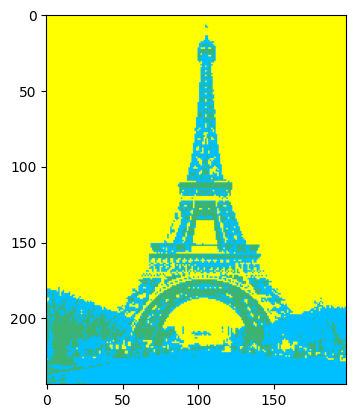

In [167]:
startcent = [np.array([0,0,0]),np.array([0.1,0.1,0.1]),np.array([0.2,0.2,0.2])]
imagedata = x
k_means = KMeans(k=3)
k_means.fit(imagedata,startcent)
print(k_means.centroids)
print(k_means.sse)
temp = []
for point in imagedata:
  temp.append(k_means.pred(point))
clusterlabels = np.array(temp)
imgrecolor = np.reshape(np.array(color_scheme)[clusterlabels],img.shape)
plt.imshow(imgrecolor)

{0: array([0.07424837, 0.05996573, 0.04425154]), 1: array([0.22125772, 0.18872064, 0.1353135 ]), 2: array([0.35789855, 0.36088455, 0.18383425]), 3: array([0.55642712, 0.50304802, 0.44813234]), 4: array([0.21847755, 0.44695332, 0.6959673 ]), 5: array([0.75551212, 0.7886268 , 0.82998426])}
4709.379195482143


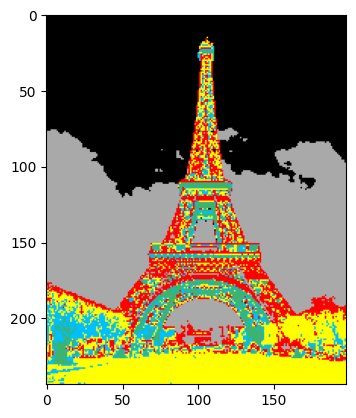

In [168]:
startcent = [np.array([0,0,0]),np.array([0.1,0.1,0.1]),np.array([0.2,0.2,0.2]),np.array([0.3,0.3,0.3]),np.array([0.4,0.4,0.4]),np.array([0.5,0.5,0.5])]
imagedata = x
k_means = KMeans(k=6)
k_means.fit(imagedata,startcent)
print(k_means.centroids)
print(k_means.sse)
temp = []
for point in imagedata:
  temp.append(k_means.pred(point))
clusterlabels = np.array(temp)
imgrecolor = np.reshape(np.array(color_scheme)[clusterlabels],img.shape)
plt.imshow(imgrecolor)

{0: array([0.06491105, 0.0525836 , 0.03926551]), 1: array([0.19205709, 0.16010221, 0.11672877]), 2: array([0.30951602, 0.31704352, 0.1506418 ]), 3: array([0.40720562, 0.38868401, 0.24490924]), 4: array([0.17285173, 0.40931168, 0.66734503]), 5: array([0.28754975, 0.50496928, 0.74064791]), 6: array([0.59546104, 0.53760669, 0.48190318]), 7: array([0.57024792, 0.68332141, 0.80630854]), 8: array([0.73877381, 0.76870916, 0.80532515]), 9: array([0.84350113, 0.85384145, 0.87510227])}
3252.0361424950825


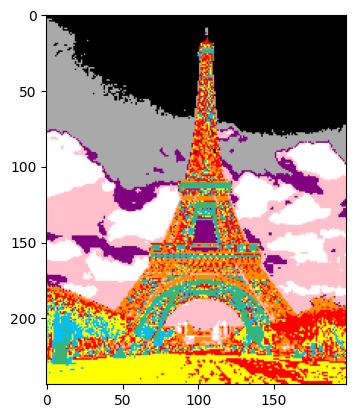

In [169]:
startcent = [np.array([0,0,0]),np.array([0.1,0.1,0.1]),np.array([0.2,0.2,0.2]),np.array([0.3,0.3,0.3]),np.array([0.4,0.4,0.4]),np.array([0.5,0.5,0.5]),np.array([0.6,0.6,0.6]),np.array([0.7,0.7,0.7]),np.array([0.8,0.8,0.8]),np.array([0.9,0.9,0.9])]
imagedata = x
k_means = KMeans(k=10)
k_means.fit(imagedata,startcent)
print(k_means.centroids)
print(k_means.sse)
temp = []
for point in imagedata:
  temp.append(k_means.pred(point))
clusterlabels = np.array(temp)
imgrecolor = np.reshape(np.array(color_scheme)[clusterlabels],img.shape)
plt.imshow(imgrecolor)